## A note on random numbers and dimensionality

SETUP

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from QuantLib import *

In [2]:
def set_unit_square(ax):
    ax,axis('scaled')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

## Covering a unit square

In [3]:
rng = MersenneTwisterUniformRng(42)

In [4]:
xs = []
ys = []
for i in range(2047):
    xs.append(rng.next().value())
    ys.append(rng.next().value())

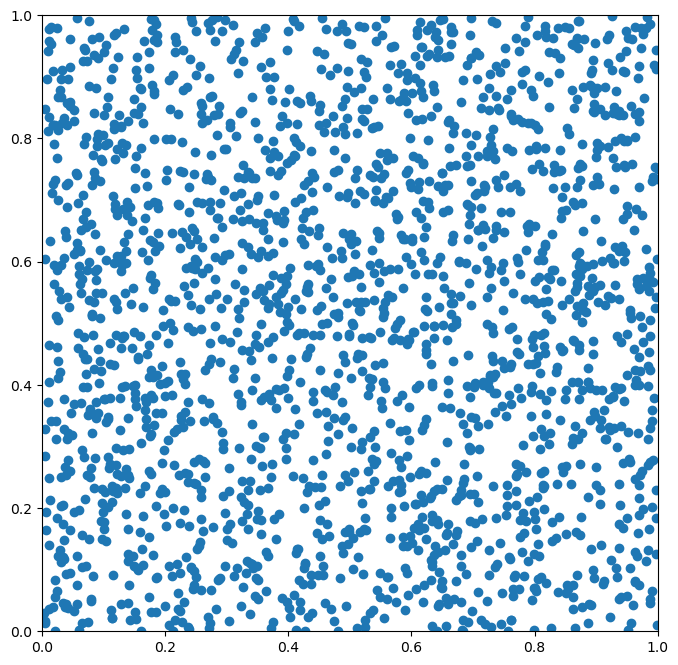

In [6]:
import matplotlib.pyplot as plt

def set_unit_square(ax):
    ax.axis('scaled')  # Corrected this line
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
set_unit_square(ax)
ax.plot(xs, ys, 'o')
plt.show()


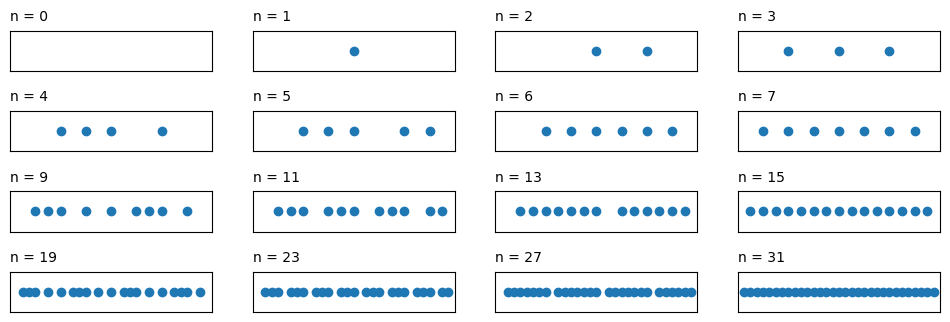

In [8]:
fig = plt.figure(figsize=(12,4))
for i, n in enumerate([0,1,2,3, 4,5,6,7, 9,11,13,15, 19,23,27,31]):
    rng = SobolRsg(1)
    xs = [ rng.nextSequence().value()[0] for j in range(n) ]
    ax = fig.add_subplot(4, 4, i+1)
    ax.axis('scaled')
    ax.set_xlim([0,1])
    ax.set_ylim([-0.1,0.1])
    ax.set_xticks([] )
    ax.set_yticks( [] )
    ax.plot(xs,[0]*len(xs),'o')
    ax.text(0.0, 0.15, 'n = %d' % n)
    

In [9]:
rng = SobolRsg(1)

In [10]:
xs = []
ys = []
for i in range(2047):
    xs.append(rng.nextSequence().value()[0])
    ys.append(rng.nextSequence().value()[0])

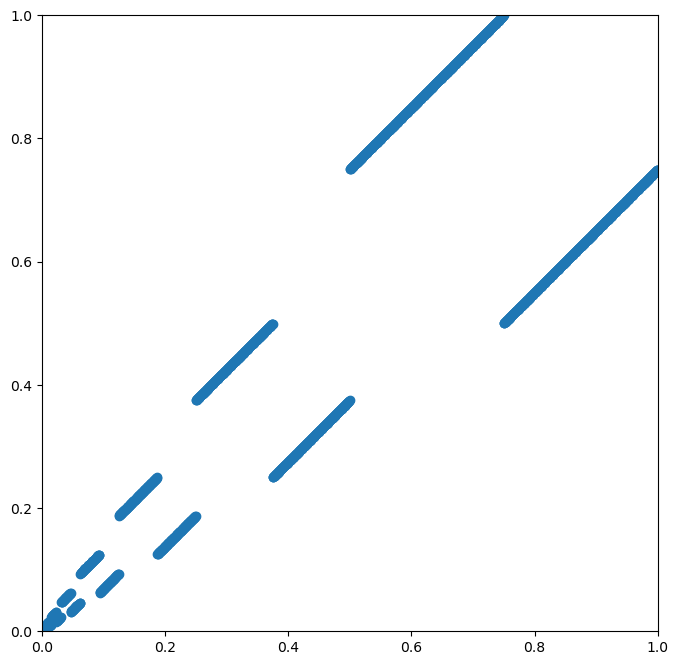

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
set_unit_square(ax)
ax.plot(xs,ys,'o');

In [12]:
rng = SobolRsg(2)

In [14]:
xs = []
ys = []
for i in range(2047):
    x,y = rng.nextSequence().value()
    xs.append(x)
    ys.append(y)
    

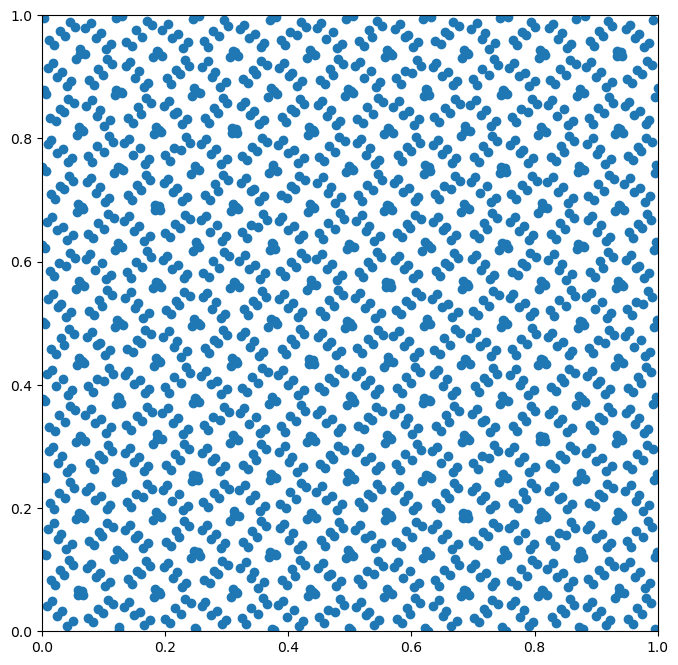

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
set_unit_square(ax)
ax.plot(xs,ys,'o');

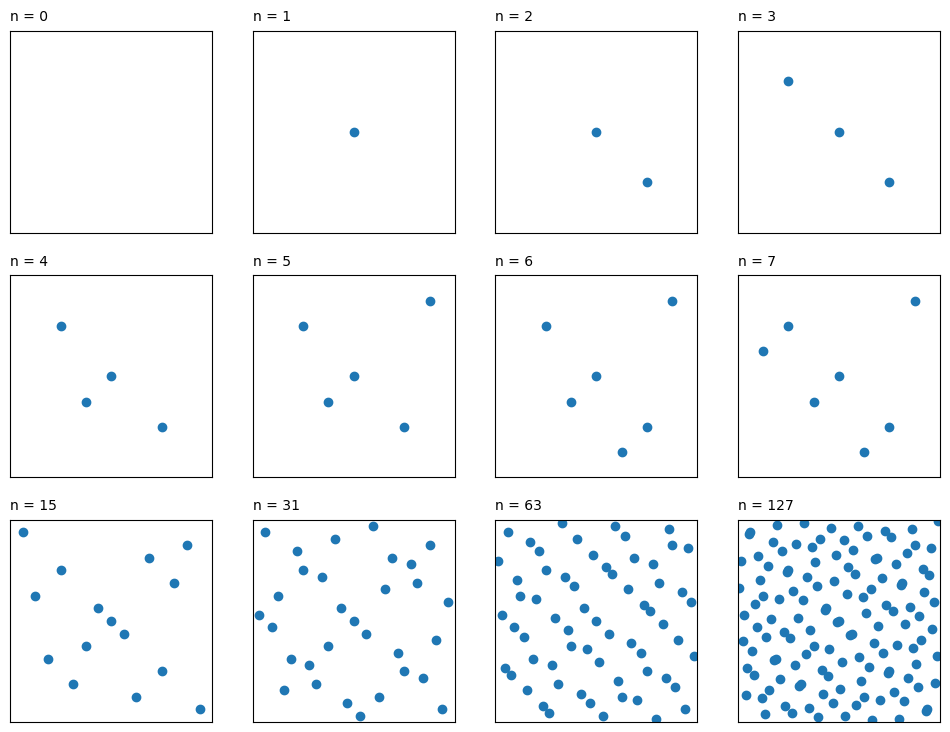

In [19]:
import matplotlib.pyplot as plt
from QuantLib import SobolRsg

fig = plt.figure(figsize=(12, 9))
for i, n in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 15, 31, 63, 127]):
    rng = SobolRsg(2)
    ax = fig.add_subplot(3, 4, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    points = [rng.nextSequence().value() for j in range(n)] if n != 0 else []
    xs, ys = zip(*points) if points else ([], [])
    ax.axis('scaled')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.plot(xs, ys, 'o')
    ax.text(0.0, 1.05, 'n = %d' % n)

plt.show()


## Dimensionality of Monte Carlo simulations

The classes in the QuantLib Monte Carlo framework will check the dimensionality of the generators
they’re given and will warn you if it’s not correct. It’s still up to you to find the correct one, while
writing your engines (for details on that, you can check chapter 6 of Implementing QuantLib

In [20]:
today = Date(27,January,2018)
Settings.instance().evaluationDate = today
risk_free = YieldTermStructureHandle(FlatForward(today, 0.01, Actual360()))

processes = [
    BlackScholesProcess(QuoteHandle(SimpleQuote(S)),
                        risk_free,
                        BlackVolTermStructureHandle(
                            BlackConstantVol(today, TARGET(), sigma, Actual360())))
  for S, sigma in [(100, 0.20),
                   ( 80, 0.25),
                   (110, 0.18)] ]

In [21]:
rho = [[1.0, 0.6, 0.8],
       [0.6, 1.0, 0.4],
       [0.8, 0.4, 1.0]]
process = StochasticProcessArray(processes, rho)
print(process.factors())

3


In [30]:
from QuantLib import *

# Define the rng function
def rng(dimensionality):
    return GaussianRandomSequenceGenerator(
        UniformRandomSequenceGenerator(
            dimensionality,
            UniformRandomGenerator(43)
        )
    )

times = [0.25, 0.50, 0.75, 1.0]
dimensionality = 3 * len(times)  # 3 factors * number of time steps
generator = GaussianMultiPathGenerator(process, times, rng(dimensionality))


In [31]:
generator = GaussianMultiPathGenerator(process, times, rng(12))

In [32]:
sample = generator.next().value()

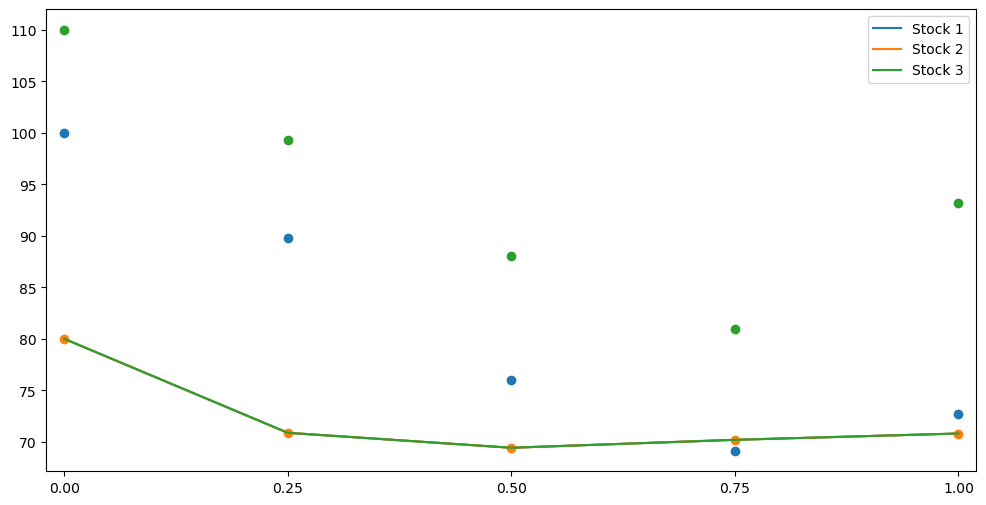

In [33]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ts = [0.0] + times
y_min = 80
y_max = 110
for i in range(3):
    p, = ax.plot(ts, sample[1], label='Stock %d' % (i+1))
    ax.plot(ts, sample[i], 'o', color=p.get_color())
    y_min = min(y_min, min(sample[i]))
    y_max = max(y_max, max(sample[i]))
    ax.set_xlim(0.0-0.02, 1.0+0.02)
    ax.set_xticks(ts)
    ax.set_ylim(y_min-2, y_max+2)
    ax.legend(loc='best');